In [1]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census = pd.read_csv(file2)
combined = pd.read_csv(file3)

In [2]:
shootings_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5437,5954,James Tober,2020-06-28,shot,gun,68.0,Male,Unknown,Kettering,Ohio,OH,True,attack,Not fleeing,False
5438,5953,John Parks,2020-06-29,shot,undetermined,57.0,Male,White,Paducah,Kentucky,KY,False,undetermined,Car,False
5439,5958,Wade Russell Meisberger,2020-06-29,shot,gun,48.0,Male,White,Hazleton,Pennsylvania,PA,False,attack,Car,False
5440,5962,Brittany S. Teichroeb,2020-06-29,shot,gun,26.0,Female,White,Midland,Texas,TX,False,other,Other,False


In [3]:
total_deaths = len(shootings_df['id'].value_counts())
total_deaths

5442

In [4]:
# Calculate race totals and percentages per race
race_count = shootings_df["race"].value_counts()
race_percent = (race_count / total_deaths) * 100

# Summary 
racial_demographics = pd.DataFrame({"Total Fatal Shooting Deaths": race_count,"Percentage of Deaths": race_percent})

# Clean/format
racial_demographics["Percentage of Deaths"] = racial_demographics["Percentage of Deaths"].map('{0:,.2f}%'.format)

# Display
racial_demographics


,Total Fatal Shooting Deaths,Percentage of Deaths
White,2494,45.83%
Black,1298,23.85%
Hispanic,906,16.65%
Unknown,524,9.63%
Asian,94,1.73%
Native American,78,1.43%
Other,48,0.88%


In [56]:
#creating dictionary for formatting percentages
format_dict = {"Percentage Shot":"{:.2%}","Percentage Shot and Tasered":"{:.2%}","Percentage Male":"{:.2%}", 
               "Percentage Female":"{:.2%}", "Percentage Unknown":"{:.2%}"}

#creating new datafram to add percentage for each manner of death
racial_demographics_manner_of_death = racial_demographics

shot_racial_demo = shootings_df.loc[(shootings_df["manner_of_death"] == "shot")]
shot_race_count = shot_racial_demo["race"].value_counts()
shot_tasered_race_count = racial_demographics_manner_of_death["Total Fatal Shooting Deaths"] - shot_race_count

#calculating percentage for each manner of death
shot_percent = (shot_race_count/racial_demographics_manner_of_death["Total Fatal Shooting Deaths"])
shot_tasered_percent = 1 - shot_percent

racial_demographics_manner_of_death["Total Shot"] = shot_race_count
racial_demographics_manner_of_death["Total Shot and Tasered"] = shot_tasered_race_count
racial_demographics_manner_of_death["Percentage Shot"] = shot_percent
racial_demographics_manner_of_death["Percentage Shot and Tasered"] = shot_tasered_percent

# Clean/format
racial_demographics_manner_of_death.style.format(format_dict)

,Total Fatal Shooting Deaths,Percentage of Deaths,Total Shot,Total Shot and Tasered,Percentage Shot,Percentage Shot and Tasered,Male Count,Female Count,Unknown Count,Percentage Male,Percentage Female,Percentage Unknown
White,2494,45.83%,2378,116,95.35%,4.65%,2349,144,1,9418.60%,577.39%,4.01%
Black,1298,23.85%,1229,69,94.68%,5.32%,1251,47,0,9637.90%,362.10%,0.00%
Hispanic,906,16.65%,857,49,94.59%,5.41%,879,27,0,9701.99%,298.01%,0.00%
Unknown,524,9.63%,499,25,95.23%,4.77%,514,10,0,9809.16%,190.84%,0.00%
Asian,94,1.73%,86,8,91.49%,8.51%,89,5,0,9468.09%,531.91%,0.00%
Native American,78,1.43%,77,1,98.72%,1.28%,73,5,0,9358.97%,641.03%,0.00%
Other,48,0.88%,43,5,89.58%,10.42%,44,4,0,9166.67%,833.33%,0.00%


In [57]:
fatal_gender_male = shootings_df.loc[(shootings_df["gender"] == "Male")]
race_male_count = fatal_gender_male["race"].value_counts()

fatal_gender_female = shootings_df.loc[(shootings_df["gender"] == "Female")]
race_female_count = fatal_gender_female["race"].value_counts()

fatal_gender_unknown = shootings_df.loc[(shootings_df["gender"] == "Unknown")]
race_unknown_count = fatal_gender_unknown["race"].value_counts()

#creating new dataframe to add percentage for each gender
gender_race_death = racial_demographics_manner_of_death

#calculating percentage for each gender
male_percent = (race_male_count/gender_race_death["Total Fatal Shooting Deaths"])
female_percent = (race_female_count/gender_race_death["Total Fatal Shooting Deaths"])
unknown_percent = (race_unknown_count/gender_race_death["Total Fatal Shooting Deaths"])

gender_race_death["Male Count"] = race_male_count
gender_race_death["Female Count"] = race_female_count
gender_race_death["Unknown Count"] = race_unknown_count
gender_race_death["Percentage Male"] = male_percent
gender_race_death["Percentage Female"] = female_percent
gender_race_death["Percentage Unknown"] = unknown_percent

# Clean/format
gender_race_death["Unknown Count"].fillna(0, inplace=True)
gender_race_death["Percentage Unknown"].fillna(0.0, inplace=True)
gender_race_death["Unknown Count"] = gender_race_death["Unknown Count"].astype(int)
gender_race_death.style.format(format_dict)

,Total Fatal Shooting Deaths,Percentage of Deaths,Total Shot,Total Shot and Tasered,Percentage Shot,Percentage Shot and Tasered,Male Count,Female Count,Unknown Count,Percentage Male,Percentage Female,Percentage Unknown
White,2494,45.83%,2378,116,95.35%,4.65%,2349,144,1,94.19%,5.77%,0.04%
Black,1298,23.85%,1229,69,94.68%,5.32%,1251,47,0,96.38%,3.62%,0.00%
Hispanic,906,16.65%,857,49,94.59%,5.41%,879,27,0,97.02%,2.98%,0.00%
Unknown,524,9.63%,499,25,95.23%,4.77%,514,10,0,98.09%,1.91%,0.00%
Asian,94,1.73%,86,8,91.49%,8.51%,89,5,0,94.68%,5.32%,0.00%
Native American,78,1.43%,77,1,98.72%,1.28%,73,5,0,93.59%,6.41%,0.00%
Other,48,0.88%,43,5,89.58%,10.42%,44,4,0,91.67%,8.33%,0.00%


Racial Demographics - Pie Chart

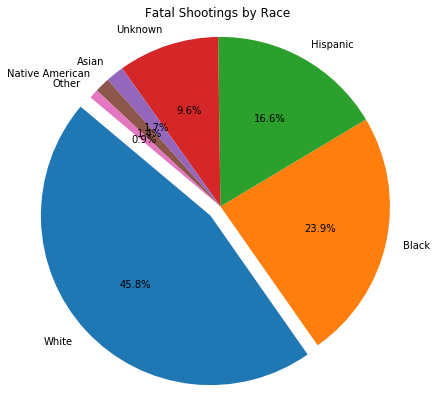

In [7]:
races = racial_demographics_manner_of_death.index.array
explode = explode = (0.08,0,0,0,0,0,0)
plt.pie(race_count, labels=races, explode=explode, autopct="%1.1f%%", startangle=140, labeldistance=1.1)
plt.axis("equal")
plt.title("Fatal Shootings by Race")
plt.gcf().set_size_inches(7,7)
plt.show()

In [8]:
shot_list = racial_demographics_manner_of_death["Total Shot"].tolist()
shot_tasered_list = racial_demographics_manner_of_death["Total Shot and Tasered"].tolist()

manner_of_death_list = np.vstack((shot_list, shot_tasered_list)).T

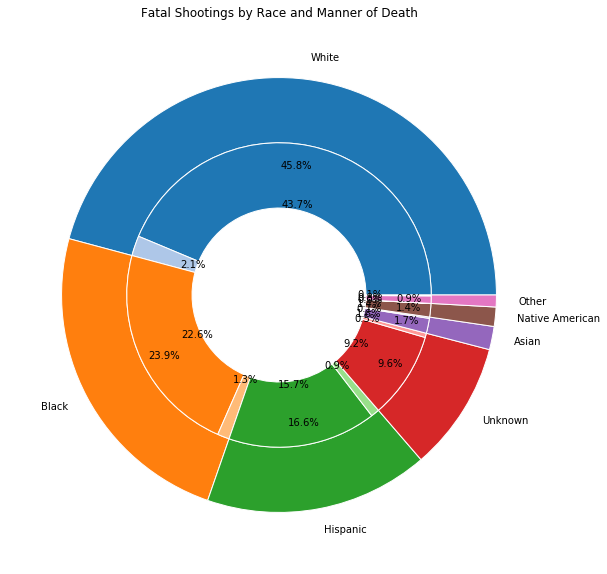

In [10]:
manner_of_death = shootings_df["manner_of_death"].unique().tolist()

fig, ax = plt.subplots()

size = 0.3

cmap = plt.get_cmap("tab10")
cmap2 =plt.get_cmap("tab20")
outer_colors = cmap(np.arange(7))
inner_colors = cmap2(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8,  9, 10, 11, 12, 13]))

ax.pie(race_count, labels=races, radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w'), autopct="%1.1f%%")

ax.pie(manner_of_death_list.flatten(), 
       #labels=manner_of_death, 
       radius=1-size, colors=inner_colors, 
       wedgeprops=dict(width=size, edgecolor='w'), autopct="%1.1f%%")

ax.set(aspect="equal", title="Fatal Shootings by Race and Manner of Death")
plt.gcf().set_size_inches(10,10)
plt.show()

### 

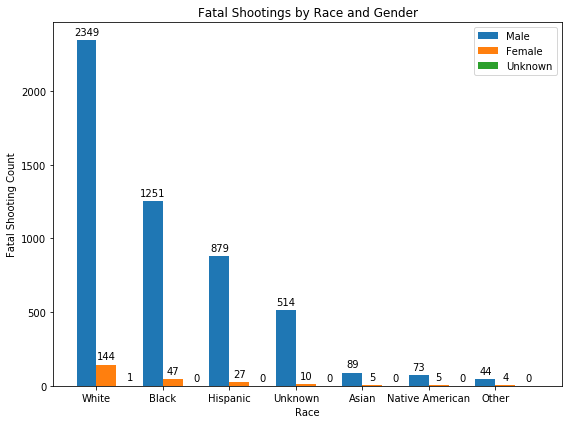

In [58]:
#labels=races, men_means=gender_race_death["Male Count"], etc
fig, ax = plt.subplots()
x_axis = np.arange(len(gender_race_death))
width=0.3
bar1 = ax.bar(x_axis-0.15, gender_race_death["Male Count"], width, label='Male')
bar2 = ax.bar(x_axis+0.15, gender_race_death["Female Count"], width, label='Female')
bar3 = ax.bar(x_axis+0.5, gender_race_death["Unknown Count"], width, label='Unknown')

#function to attach counts to bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height), xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", 
                    ha='center', va='bottom')


autolabel(bar1)
autolabel(bar2)
autolabel(bar3)

plt.title("Fatal Shootings by Race and Gender")
plt.xlabel("Race")
plt.ylabel("Fatal Shooting Count")
ax.set_xticklabels(races)
ax.set_xticks(x_axis)
ax.legend()
plt.gcf().set_size_inches(8,6)
plt.tight_layout()
plt.show()